In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
file_path = "C:/Users/Srnzzz/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv"

In [4]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv(file_path)

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [46]:
# Generate a frequency table for the product category.
# Which are the top 5 most listed product categories?

category_frequency = df["category"].value_counts().sort_values(ascending=False).head(5)
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

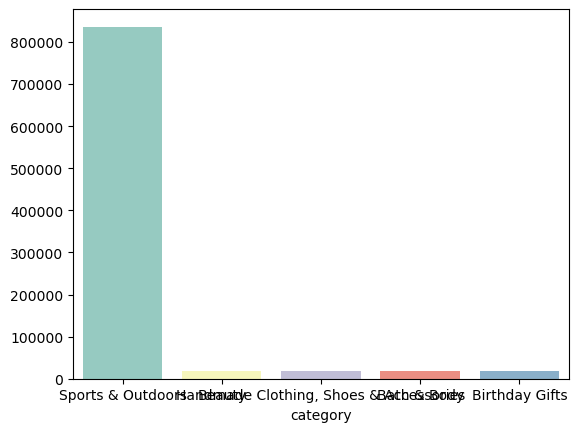

In [20]:
# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

sns.barplot(x=category_frequency.index, y=category_frequency.values, palette="Set3");

In [27]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [26]:
# How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
# Calculate the mean, median, and mode for the price of products.
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price # The average value highly deviates from the most common price point. This means, that we may have many outliers that influence th mean. 

(89.24380943923663, 19.09, 9.99)

In [32]:
# Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

statistics = {"Variance": variance_price,
              "Standard Deviation": std_dev_price,
              "Min Price": min_price,
              "Max Price": max_price,
              "Price Range": range_price,
              "Quantiles Price": quantiles_price}

pd.DataFrame(statistics)
# 50% of the prices range between 9.99 and 45.99, however, we have a price range of 100,000.

,Variance,Standard Deviation,Min Price,Max Price,Price Range,Quantiles Price
0.25,119445.485323,345.608862,0.0,100000.0,100000.0,9.99
0.50,119445.485323,345.608862,0.0,100000.0,100000.0,19.09
0.75,119445.485323,345.608862,0.0,100000.0,100000.0,45.99


In [33]:
skewness_price = df['price'].skew() # 0 for normal distribution
kurtosis_price = df['price'].kurtosis() # 3 for normal distribution

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

C:\Users\Srnzzz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

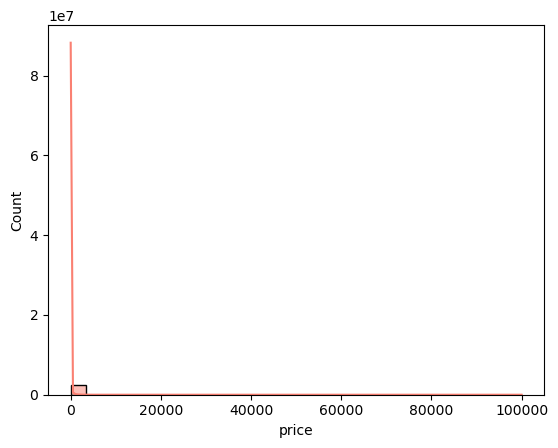

In [34]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], kde=True, bins=30, color="salmon")
# it is hard to read bc of outliers

In [48]:
df['price_quantile'] = pd.qcut(df['price'], q=4, labels=['very cheap', 'cheap', 'expensive', 'very expensive'])

df.price_quantile.value_counts()

price_quantile
very cheap        629239
expensive         612341
very expensive    609043
cheap             593028
Name: count, dtype: int64

In [53]:
price_bin = pd.qcut(df["price"], q=4)
sns.countplot(price_bin)

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

<Axes: >

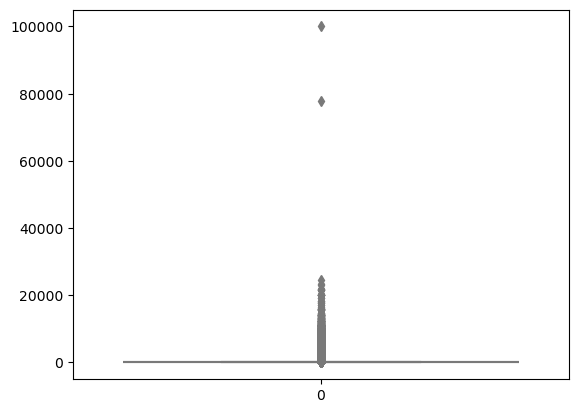

In [35]:
sns.boxplot(data = df['price'], color="lightblue")

<Axes: >

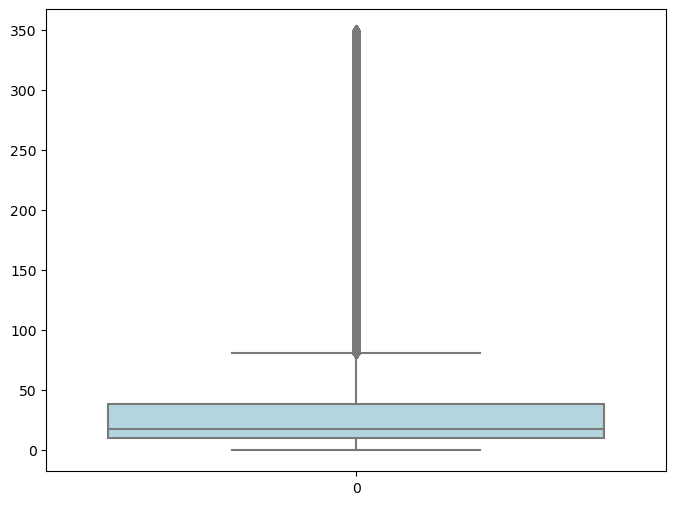

In [36]:
# Filter data to exclude the top 5% of values (or adjust as needed)
upper_limit = df['price'].quantile(0.95)
filtered_data = df[df['price'] <= upper_limit]

# Plot boxplot for the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data['price'], color="lightblue")

<Axes: >

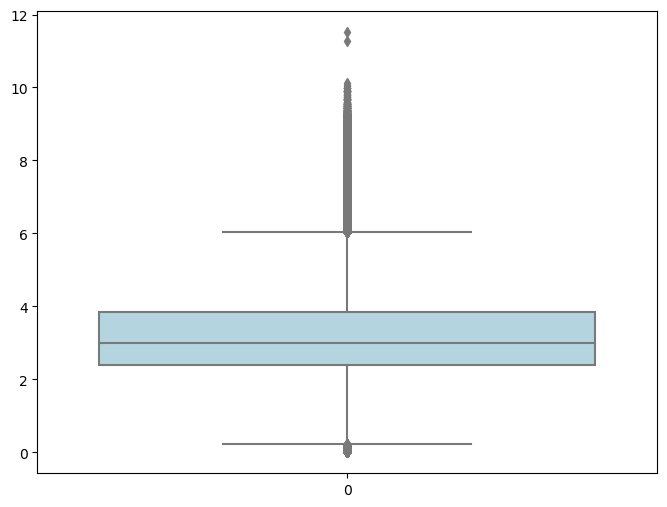

In [37]:
import numpy as np

# Apply log transformation (adding 1 to avoid log(0))
log_prices = np.log1p(df['price'])

# Plot boxplot of the log-transformed data
plt.figure(figsize=(8, 6))
sns.boxplot(data=log_prices, color="lightblue")

In [56]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

statistics_stars = {"Variance": variance_price,
              "Standard Deviation": std_dev_price,
              "Min Stars": min_price,
              "Max Stars": max_price,
              "Price Range": range_price,
              "Quantiles Stars": quantiles_price}

pd.DataFrame(statistics_stars)

,Variance,Standard Deviation,Min Stars,Max Stars,Price Range,Quantiles Stars
0.25,4.817434,2.194865,0.0,5.0,5.0,0.0
0.50,4.817434,2.194865,0.0,5.0,5.0,0.0
0.75,4.817434,2.194865,0.0,5.0,5.0,4.4


In [57]:
skewness_price = df['stars'].skew() # 0
kurtosis_price = df['stars'].kurtosis() # 3

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

<Axes: >

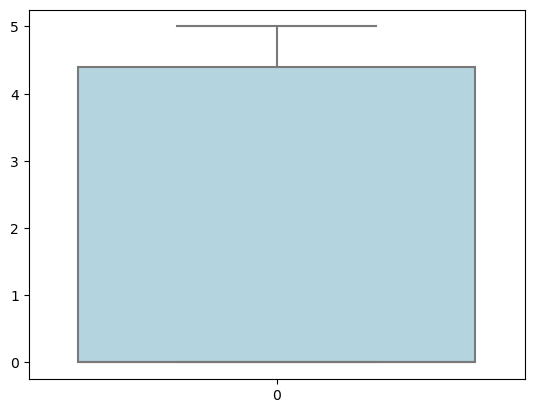

In [58]:
sns.boxplot(data = df['stars'], color="lightblue")

C:\Users\Srnzzz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

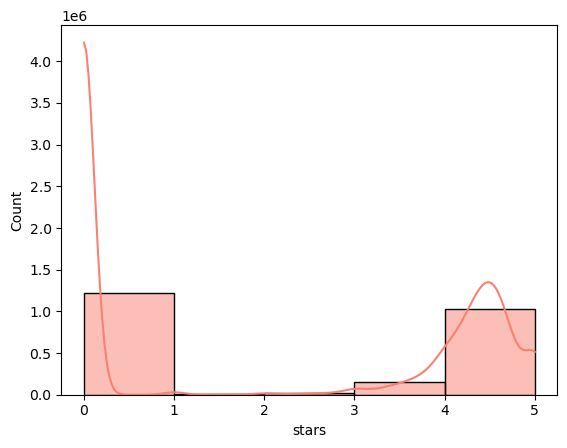

In [61]:
sns.histplot(df['stars'], kde=True, bins=5, color="salmon")

In [62]:
df_nz = df[df["stars"].isin([1,2,3,4,5])]
df_nz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_quantile
74,75,B09LYZM9RJ,"Fenton SHFS10W Active Subwoofer Speaker, 10"" f...",5.0,1,169.00,False,0,Hi-Fi Speakers,very expensive
85,86,B009L3ZXYU,4x Skytronic Home Hi-Fi Stereo Tower Speakers ...,4.0,1,229.00,False,0,Hi-Fi Speakers,very expensive
98,99,B008MM2U4W,"Fenton SHFS08W Active Subwoofer Speaker, 8"" fo...",3.0,4,140.00,False,0,Hi-Fi Speakers,very expensive
176,178,B09F72WYQH,"Portable Bluetooth Speaker, 30W Wireless Speak...",4.0,243,39.98,False,0,Hi-Fi Speakers,expensive
236,239,B0BG2SXVCD,Hisense AX5100G 5.1 Channel 340W Dobly Atmos S...,4.0,68,229.00,False,0,Hi-Fi Speakers,very expensive
...,...,...,...,...,...,...,...,...,...,...
2443618,2828559,B085VH6XP7,PROFIRST Textile Motorbike Motorcycle Ladies T...,5.0,1,49.49,False,0,Motorbike Clothing,very expensive
2443630,2828571,B0B8NRNQZN,Joe Browns Men's Classic Motorbike Off Centre ...,5.0,2,27.00,False,0,Motorbike Clothing,expensive
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing,very expensive
2443633,2828574,B0B51Z7ZM5,WESTWOOD FOX Motorcycle Gloves for Men and Wom...,4.0,71,11.99,False,0,Motorbike Clothing,cheap


C:\Users\Srnzzz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

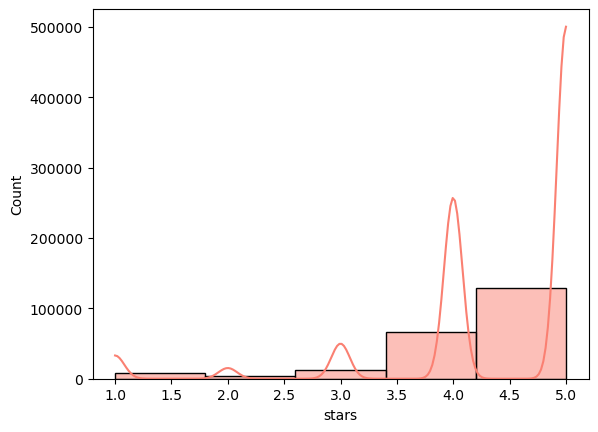

In [67]:
sns.histplot(df_nz["stars"], kde=True, bins=5, color="salmon")

In [66]:
skewness_price = df_nz['stars'].skew() # 0
kurtosis_price = df_nz['stars'].kurtosis() # 3

skewness_price, kurtosis_price

(-1.9768119236978796, 3.9322198002969158)